# Stroke dataset EDA and classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
pd.set_option('display.max_columns', 30)

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [3]:
data = data.drop(columns=['id'])

## Data explanation

#### Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

#### Columns:
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not

source: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


### Insights at first glance:
* There are 12 variables in the dataset
* From these 12 variables one is just a identifier
* The variables are both categorical and numeric
* The most important is our target variable - "stroke"
* "Stroke" takes values of 1 and 0 (did or did not have a stroke)
* Some of the values of "bmi" are missing

## Categorical variables
Working with categorical variables as objects might be difficult. Let's see what values do the columns have

In [5]:
print('Gender: ' + str(data['gender'].unique()))
print('Ever_married: ' + str(data['ever_married'].unique()))
print('Work_type: ' + str(data['work_type'].unique()))
print('Residence_type: ' + str(data['Residence_type'].unique()))
print('Smoking_status: ' + str(data['smoking_status'].unique()))

Gender: ['Male' 'Female' 'Other']
Ever_married: ['Yes' 'No']
Work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
Smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


#### One hot encoding

Some categories can be switched to 0 and 1 (like Ever_married: ['Yes' 'No']) for others we can use One Hot Encoding - create a new column per category with 0 and 1 depending if the row meets the category.
Let's also switch some of the column names for better readability.

In [6]:
data_OH = pd.get_dummies(data, columns=['gender', ])
data_OH = pd.get_dummies(data_OH, columns=['work_type', ])
# data_OH = pd.get_dummies(data_OH, columns=['Residence_type', ])
data_OH = pd.get_dummies(data_OH, columns=['smoking_status', ])
data_OH['ever_married'] = data_OH['ever_married'].map({'Yes': 1, 'No': 0})
data_OH['Residence_type'] = data_OH['Residence_type'].map({'Urban': 1, 'Rural': 0})

data_OH.rename({'gender_Female':'is_female',
                    'gender_Male': 'is_male',
                    'gender_Other': 'is_nonbinary',
                    'work_type_Private': 'work_private',
                    'work_type_Self-employed': 'work_self_employed',
                    'work_type_children': 'work_children',
                    'work_type_Govt_job': 'work_govt',
                    'work_type_Never_worked': 'work_never',
                    'Residence_type': 'lives_urban',
                    'smoking_status_Unknown': 'smoking_unknown',
                    'smoking_status_formerly smoked': 'smoking_formerly',
                    'smoking_status_never smoked': 'smoking_never',
                    'smoking_status_smokes': 'smoking_currently'}, axis=1, inplace=True)

data_OH

age  hypertension  heart_disease  ever_married  lives_urban  \
0     67.0             0              1             1            1   
1     61.0             0              0             1            0   
2     80.0             0              1             1            0   
3     49.0             0              0             1            1   
4     79.0             1              0             1            0   
...    ...           ...            ...           ...          ...   
5105  80.0             1              0             1            1   
5106  81.0             0              0             1            1   
5107  35.0             0              0             1            0   
5108  51.0             0              0             1            0   
5109  44.0             0              0             1            1   

      avg_glucose_level   bmi  stroke  is_female  is_male  is_nonbinary  \
0                228.69  36.6       1      False     True         False   
1                202.21   NaN       1       True    False         False   
2                105.92  32.5       1      False     True         False   
3                171.23  34.4       1       True    False         False   
4                174.12  24.0       1       True    False         False   
...                 ...   ...     ...        ...      ...           ...   
5105              83.75   NaN       0       True    False         False   
5106             125.20  40.0       0       True    False         False   
5107              82.99  30.6       0       True    False         False   
5108             166.29  25.6       0      False     True         False   
5109              85.28  26.2       0       True    False         False   

      work_govt  work_never  work_private  work_self_employed  work_children  \
0         False       False          True               False          False   
1         False       False         False                True          False   
2         False       False          True               False          False   
3         False       False          True               False          False   
4         False       False         False                True          False   
...         ...         ...           ...                 ...            ...   
5105      False       False          True               False          False   
5106      False       False         False                True          False   
5107      False       False         False                True          False   
5108      False       False          True               False          False   
5109       True       False         False               False          False   

      smoking_unknown  smoking_formerly  smoking_never  smoking_currently  
0               False              True          False              False  
1               False             False           True              False  
2               False             False           True              False  
3               False             False          False               True  
4               False             False           True              False  
...               ...               ...            ...                ...  
5105            False             False           True              False  
5106            False             False           True              False  
5107            False             False           True              False  
5108            False              True          False              False  
5109             True             False          False              False  

[5110 rows x 20 columns]

In [7]:
data.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1

In [8]:
data_OH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 5110 non-null   float64
 1   hypertension        5110 non-null   int64  
 2   heart_disease       5110 non-null   int64  
 3   ever_married        5110 non-null   int64  
 4   lives_urban         5110 non-null   int64  
 5   avg_glucose_level   5110 non-null   float64
 6   bmi                 4909 non-null   float64
 7   stroke              5110 non-null   int64  
 8   is_female           5110 non-null   bool   
 9   is_male             5110 non-null   bool   
 10  is_nonbinary        5110 non-null   bool   
 11  work_govt           5110 non-null   bool   
 12  work_never          5110 non-null   bool   
 13  work_private        5110 non-null   bool   
 14  work_self_employed  5110 non-null   bool   
 15  work_children       5110 non-null   bool   
 16  smokin

## Ordinal encoder

Ordinal encoding treats categories as consecutive numbers

In [9]:
from category_encoders.ordinal import OrdinalEncoder
Ordinal_encoder = OrdinalEncoder()
data_ORD = Ordinal_encoder.fit_transform(X=data)

In [10]:
data_ORD.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          1   
1       2  61.0             0              0             1          2   
2       1  80.0             0              1             1          1   
3       2  49.0             0              0             1          1   
4       2  79.0             1              0             1          2   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               2             202.21   NaN               2       1  
2               2             105.92  32.5               2       1  
3               1             171.23  34.4               3       1  
4               2             174.12  24.0               2       1

In [11]:
data_ORD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


#### Weight of Evidence encoding

For comparision, we can also treat categorical data using Weight of Evidence encoding. It measures the distribution of categories based on the target variable. Also unlike One Hot encoding it does not create new columns.

In [12]:
from category_encoders.woe import WOEEncoder
WOE_encoder = WOEEncoder()
data_WOE = WOE_encoder.fit_transform(X=data, 
                                     y=data['stroke'])

In [13]:
data_WOE.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0  0.050411  67.0             0              1      0.312055   0.045467   
1 -0.036692  61.0             0              0      0.312055   0.526895   
2  0.050411  80.0             0              1      0.312055   0.045467   
3 -0.036692  49.0             0              0      0.312055   0.045467   
4 -0.036692  79.0             1              0      0.312055   0.526895   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0        0.067883             228.69  36.6        0.522223       1  
1       -0.074751             202.21   NaN       -0.022390       1  
2       -0.074751             105.92  32.5       -0.022390       1  
3        0.067883             171.23  34.4        0.107755       1  
4       -0.074751             174.12  24.0       -0.022390       1

In [14]:
data_WOE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   float64
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   float64
 5   work_type          5110 non-null   float64
 6   Residence_type     5110 non-null   float64
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   float64
 10  stroke             5110 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 439.3 KB


## Missing values
As we can see there are 201 NaN values in the BMI column. There are two ways of treating them:
1. Dropping rows with missing values
2. Extrapolating them


Almost 4% of data has missing values, it's a little to significant to drop so let's fill them using k Nearest Neighbours algorithm.

In [15]:
from sklearn.impute import KNNImputer

data_list = [data_OH, data_ORD, data_WOE]

for dataset in data_list:
    imputer = KNNImputer()
    imputer.fit(dataset)
    # assigning to df[:] is a trick to return dataframe instead of np array
    dataset[:] = imputer.transform(dataset)

In [16]:
data_OH.head()

age  hypertension  heart_disease  ever_married  lives_urban  \
0  67.0             0              1             1            1   
1  61.0             0              0             1            0   
2  80.0             0              1             1            0   
3  49.0             0              0             1            1   
4  79.0             1              0             1            0   

   avg_glucose_level    bmi  stroke  is_female  is_male  is_nonbinary  \
0             228.69  36.60       1        0.0      1.0           0.0   
1             202.21  32.56       1        1.0      0.0           0.0   
2             105.92  32.50       1        0.0      1.0           0.0   
3             171.23  34.40       1        1.0      0.0           0.0   
4             174.12  24.00       1        1.0      0.0           0.0   

   work_govt  work_never  work_private  work_self_employed  work_children  \
0        0.0         0.0           1.0                 0.0            0.0   
1        0.0         0.0           0.0                 1.0            0.0   
2        0.0         0.0           1.0                 0.0            0.0   
3        0.0         0.0           1.0                 0.0            0.0   
4        0.0         0.0           0.0                 1.0            0.0   

   smoking_unknown  smoking_formerly  smoking_never  smoking_currently  
0              0.0               1.0            0.0                0.0  
1              0.0               0.0            1.0                0.0  
2              0.0               0.0            1.0                0.0  
3              0.0               0.0            0.0                1.0  
4              0.0               0.0            1.0                0.0

In [17]:
data_OH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 5110 non-null   float64
 1   hypertension        5110 non-null   int64  
 2   heart_disease       5110 non-null   int64  
 3   ever_married        5110 non-null   int64  
 4   lives_urban         5110 non-null   int64  
 5   avg_glucose_level   5110 non-null   float64
 6   bmi                 5110 non-null   float64
 7   stroke              5110 non-null   int64  
 8   is_female           5110 non-null   float64
 9   is_male             5110 non-null   float64
 10  is_nonbinary        5110 non-null   float64
 11  work_govt           5110 non-null   float64
 12  work_never          5110 non-null   float64
 13  work_private        5110 non-null   float64
 14  work_self_employed  5110 non-null   float64
 15  work_children       5110 non-null   float64
 16  smokin

In [18]:
data_ORD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


In [19]:
data_WOE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   float64
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   float64
 5   work_type          5110 non-null   float64
 6   Residence_type     5110 non-null   float64
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   float64
 10  stroke             5110 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 439.3 KB


### BMI distributions of calculaions based on One Hot, Ordinal and Weight of Evidence encodings

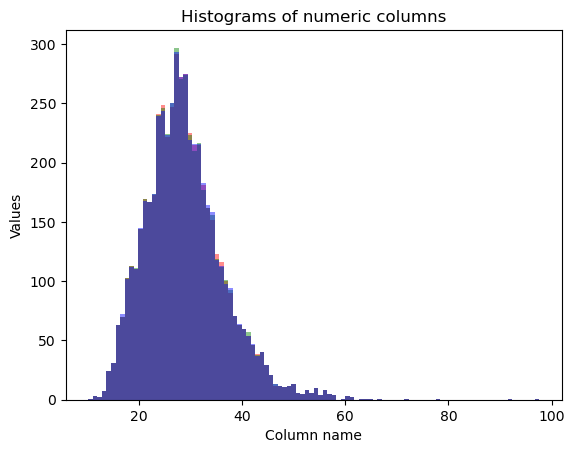

In [20]:
plt.hist(data_OH['bmi'], bins=100, alpha=0.45, color='red') 
plt.hist(data_ORD['bmi'], bins=100, alpha=0.45, color='green') 
plt.hist(data_WOE['bmi'], bins=100, alpha=0.45, color='blue') 

plt.title('Histograms of numeric columns')
plt.xlabel('Column name')
plt.ylabel('Values')
plt.show()

We can see that despite the encodings beeing diffrent, the distribution of imputated BMI does not change (there are three graphs on top of each other - red, green and blue, what makes it look like a one purple graph).

## Exploratory Data Analysis

### Finding outliers
Firstly we would like to see what values do the numeric columns take. We'll use boxplot - it shows us how the values are spread.

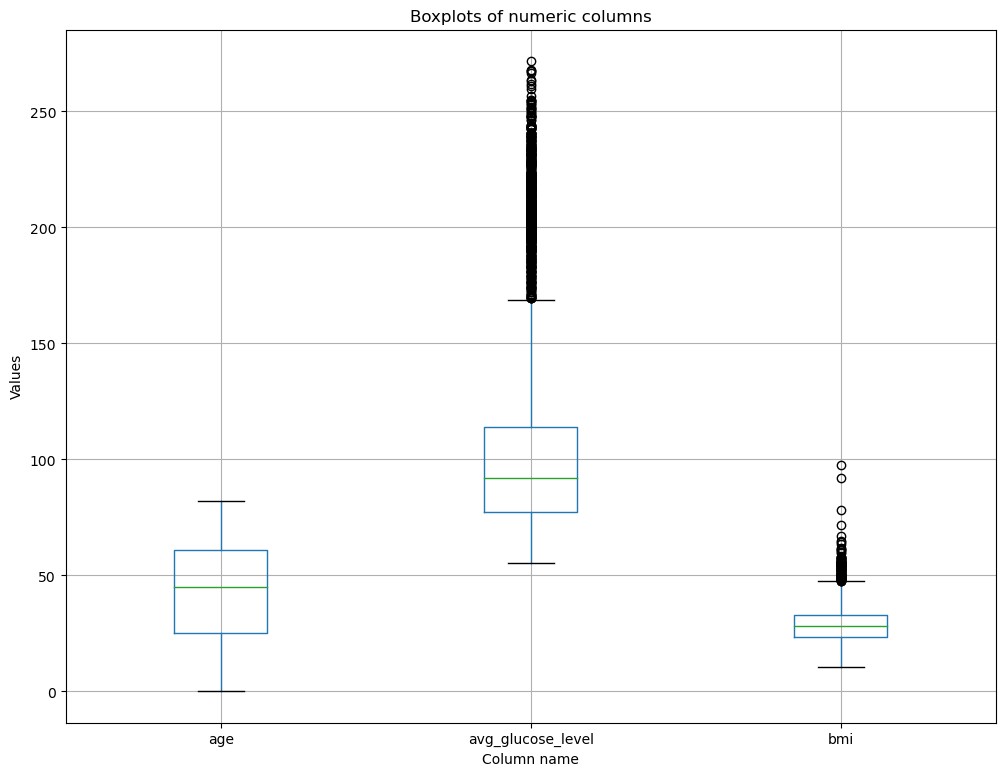

In [21]:
numeric = ['age', 'avg_glucose_level', 'bmi']
data[numeric].boxplot(figsize=(12,9))
plt.title('Boxplots of numeric columns')
plt.xlabel('Column name')
plt.ylabel('Values')
plt.show()

As we can see, age has no outliers and takes values from 0 to 75. It seems that the data is correct.
As for the avg_glucose_level and bmi we can see that the values are more spread and have a lot of outliers. In order to judge if they are plausible we need to do some research on the topics.

According to the wikipedia page on hyperglacemia (https://en.wikipedia.org/wiki/Hyperglycemia) a value of 300mg/dL can occur (we assume that is the unit used in the dataset). 

For the BMI - on the Medicover (Polish healthcare provider) site (https://odchudzanie.medicover.pl/wskaznik-bmi-stopnie-otylosci/) we can see that BMI > 100 is classified as class 10 obesity. This means that olthough the values are very high, they are plausible.

To conclude, after research we found out that all the values listed in the dataset are plausible. This means that we do not need to modify the data.

## Histograms
Histograms give us more details on how the numeric data is spread.

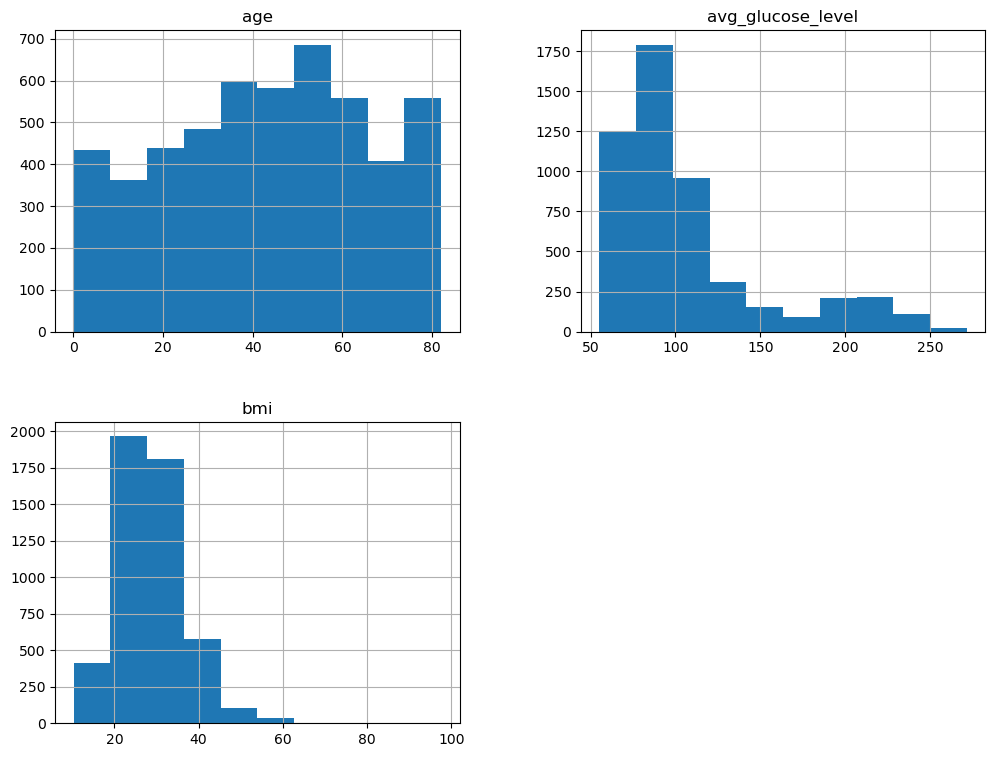

In [22]:
data[numeric].hist(figsize=(12,9))
plt.title('Histograms of numeric columns')
plt.xlabel('Column name')
plt.ylabel('Values')
plt.show()

In [23]:
data[numeric].skew()

age                 -0.137059
avg_glucose_level    1.572284
bmi                  1.055340
dtype: float64

* Age has a slight left skew
* Average glucose level and BMI are strongly skewed right

## Distribution of categorical data

In [24]:
data.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1

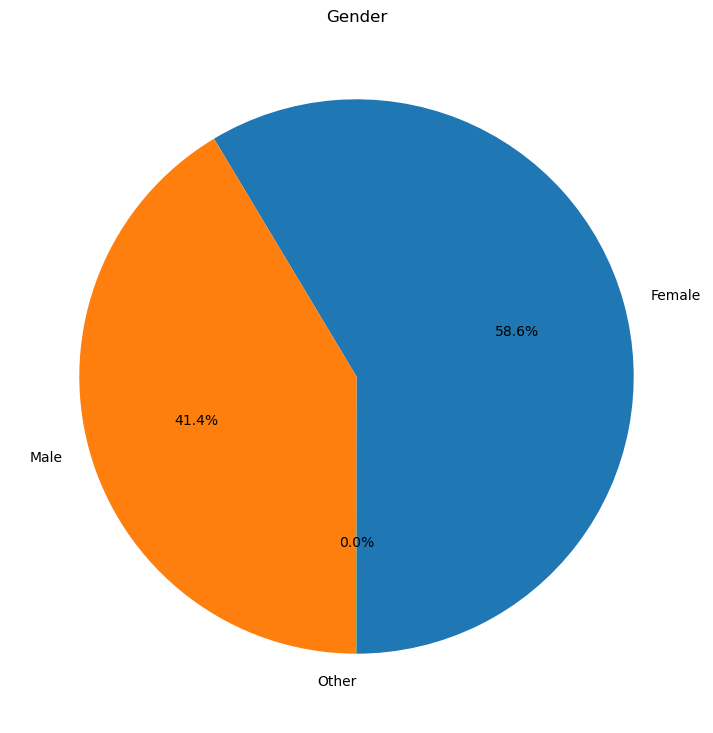

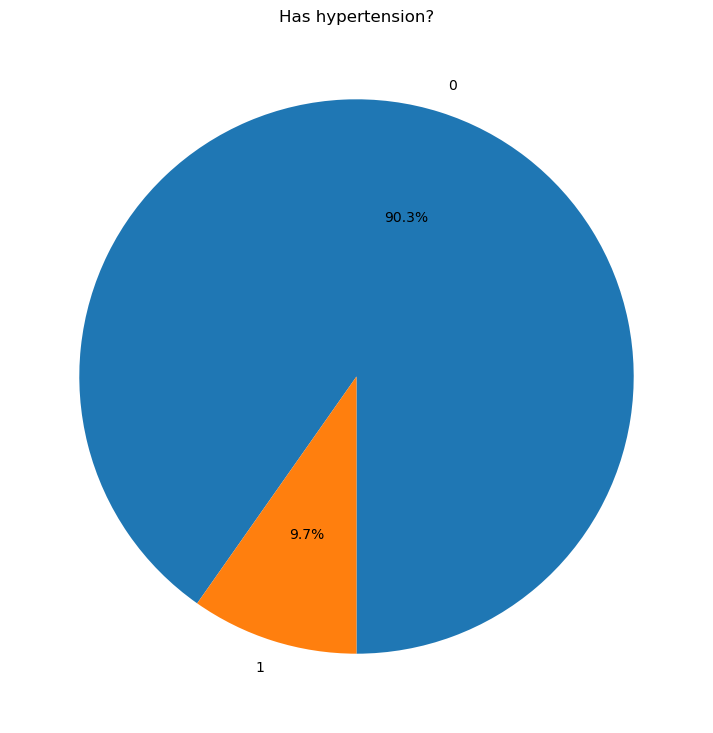

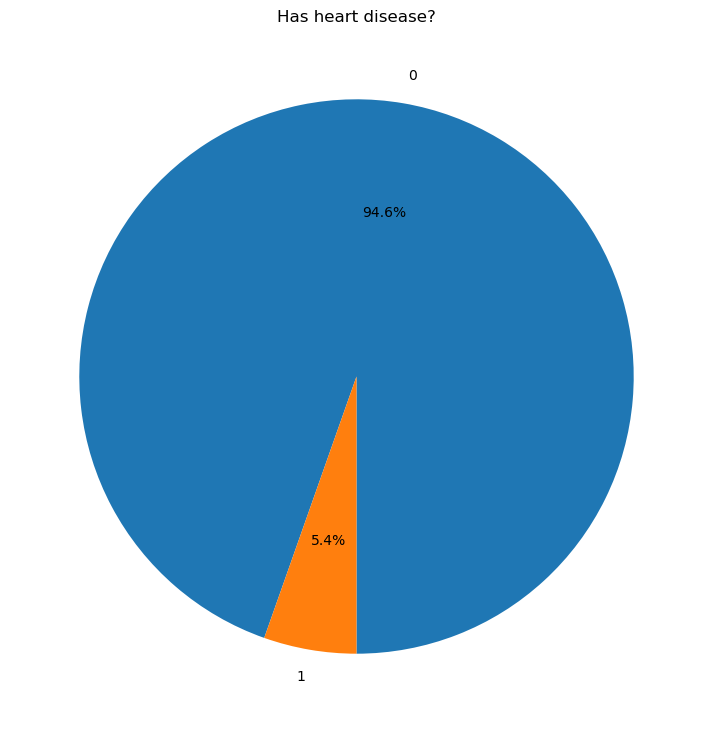

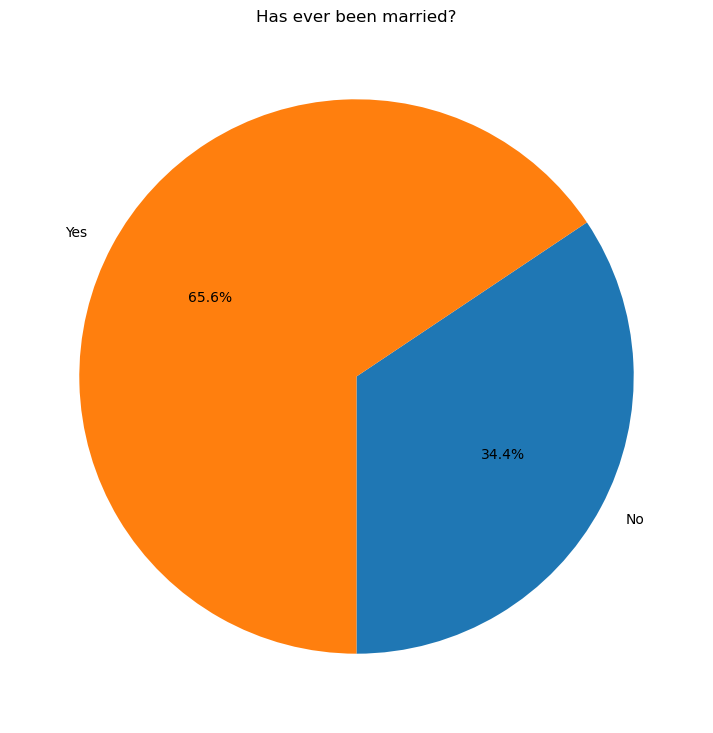

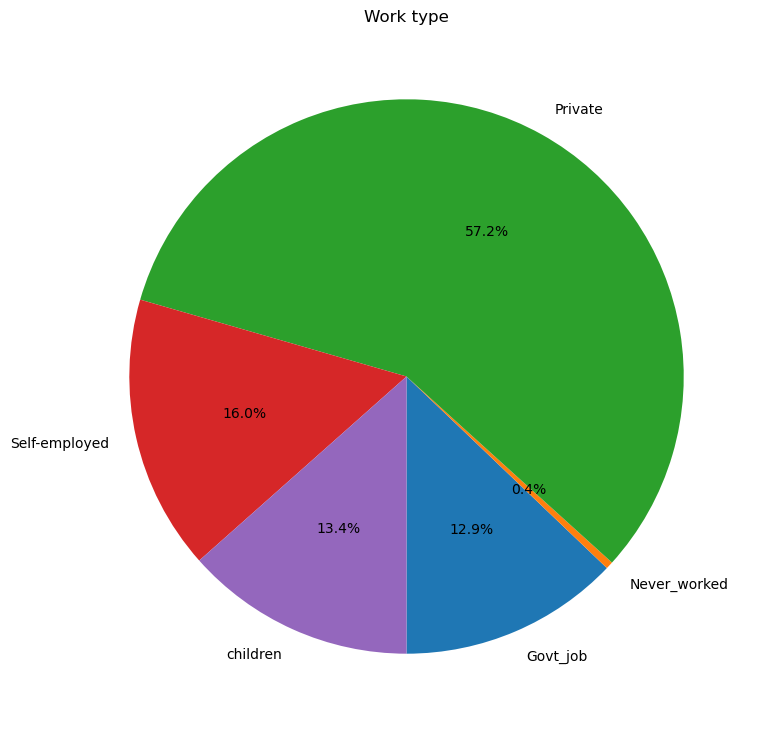

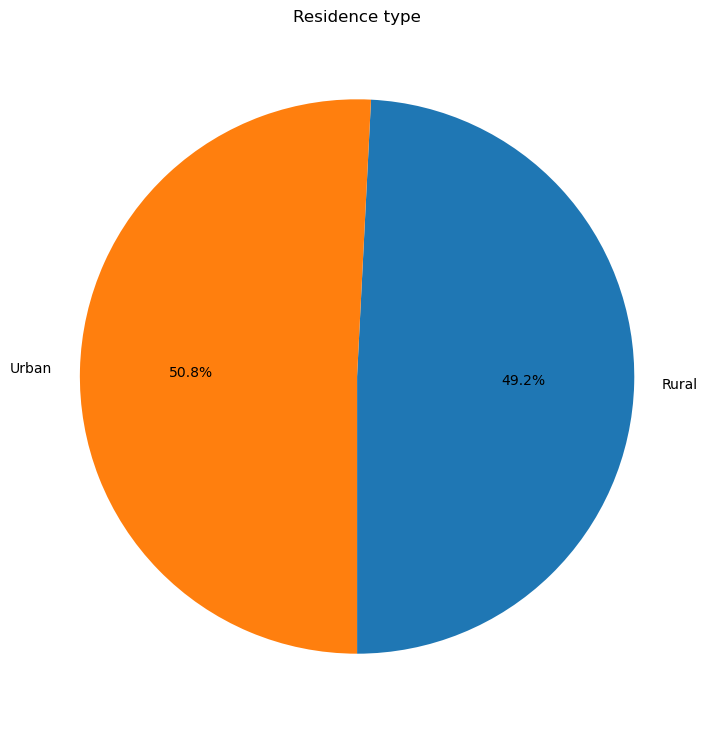

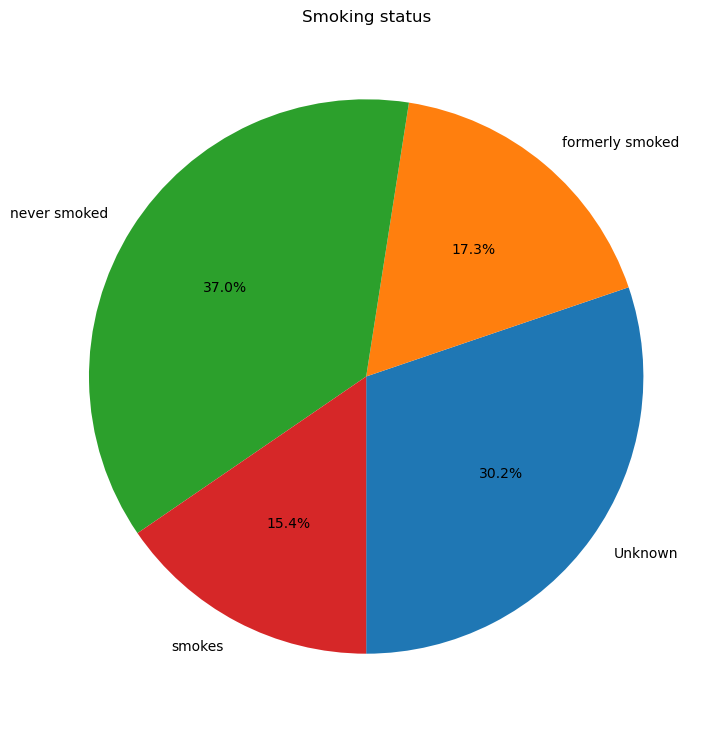

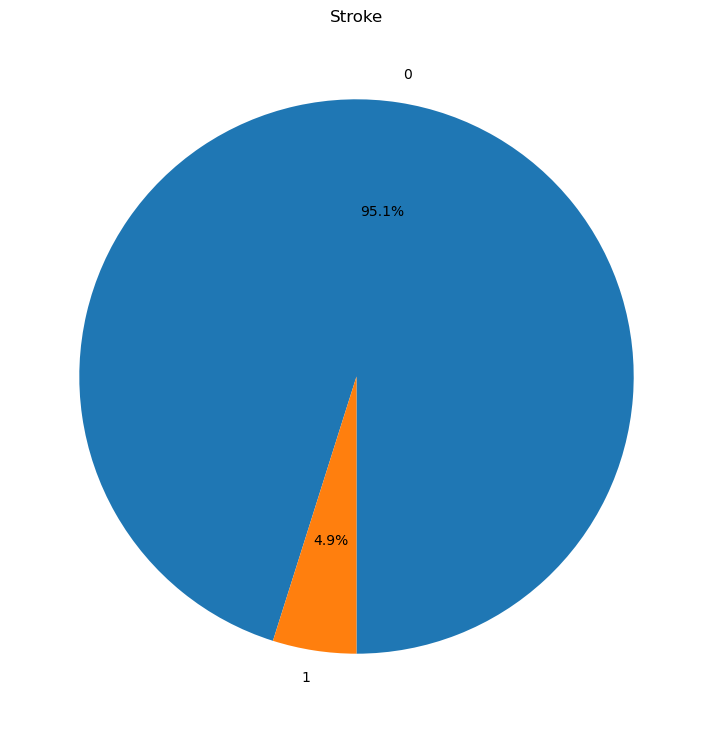

In [25]:
categories = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
categories_labels = ['Gender', 'Has hypertension?', 'Has heart disease?', 'Has ever been married?', 'Work type', 'Residence type', 'Smoking status', 'Stroke']

for category, label in zip(categories, categories_labels):
    pie_chart_data = data.groupby(category)[category].count()
    pie_chart_data.plot.pie(y=category, startangle=270, title=label, ylabel='', figsize=(12,9), autopct='%1.1f%%')
    plt.show()

# Building machine learning models

We will use:
* Logistic regression
* Decision tree
* Random forest
* AdaBoost
* Support Vector 

### Model evaluation
Firstly, we need a way to evaluate the model. In this order we will create a function returning all the necessary metrics. We will use:
* Accuracy
* Precision
* Recall
* F1 Score
* AUC - Area Under the Receiver Operating Characteristic Curve

We will also evaluate the models on both train and test data

In [26]:
def evaluate_model(model, X_train, X_test, y_train, y_test):    
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    return {
        "Accuracy_train":  sklearn.metrics.accuracy_score(y_pred_train, y_train),
        "Accuracy_test": sklearn.metrics.accuracy_score(y_pred_test, y_test),
        "Precision_train":    sklearn.metrics.precision_score(y_pred_train, y_train),
        "Precision_test":   sklearn.metrics.precision_score(y_pred_test, y_test),
        "Recall_train":    sklearn.metrics.recall_score(y_pred_train, y_train),
        "Recall_test":   sklearn.metrics.recall_score(y_pred_test, y_test),
        "F1_score_train":   sklearn.metrics.f1_score(y_pred_train, y_train),
        "F1_score_test":  sklearn.metrics.f1_score(y_pred_test, y_test),
#         "AUC_train":   sklearn.metrics.roc_auc_score(y_pred_train, y_train),
#         "AUC_test":  sklearn.metrics.roc_auc_score(y_pred_test, y_test)
    }

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn import svm

In [71]:
models_names = ['Logistic Regression', 'Decision Tree Classifier', 'Ada Boost Classifier', 'Random Forest Classifier', 'Support Vector Machine']
models_objects = [LogisticRegression(max_iter=1000, random_state=0), 
                  DecisionTreeClassifier(max_depth=3), 
                  AdaBoostClassifier(), 
                  RandomForestClassifier(n_estimators=30), 
                  svm.SVC()]

models = dict(zip(models_names, models_objects))

In [72]:
models

{'Logistic Regression': LogisticRegression(max_iter=1000, random_state=0),
 'Decision Tree Classifier': DecisionTreeClassifier(max_depth=3),
 'Ada Boost Classifier': AdaBoostClassifier(),
 'Random Forest Classifier': RandomForestClassifier(n_estimators=30),
 'Support Vector Machine': SVC()}

In [73]:
data_list_names = ['One Hot Encoding', 'Ordinal Encoding', 'Weight of Evidence Encoding']
datasets = dict(zip(data_list_names, data_list))

In [74]:
results = pd.DataFrame()


for dataset_name, dataset in datasets.items():
    X = dataset[dataset.columns.difference(['stroke'])]
    Y = dataset['stroke']
    idx_train, idx_test = sklearn.model_selection.train_test_split(np.arange(X.shape[0]), test_size=0.2, random_state=3)
    
    X_train, X_test = X.iloc[idx_train, :], X.iloc[idx_test, :]
    Y_train, Y_test = Y[idx_train], Y[idx_test]
    
    for model_name, model in models.items():
        result = evaluate_model(model, X_train, X_test, Y_train, Y_test)
        results = pd.concat([results, pd.DataFrame(result, index=[(dataset_name, model_name)])])
    

C:\Users\Kamil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kamil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kamil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kamil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being se

In [75]:
results

Accuracy_train  \
(One Hot Encoding, Logistic Regression)                   0.950587   
(One Hot Encoding, Decision Tree Classifier)              0.951076   
(One Hot Encoding, Ada Boost Classifier)                  0.951566   
(One Hot Encoding, Random Forest Classifier)              0.997798   
(One Hot Encoding, Support Vector Machine)                0.950098   
(Ordinal Encoding, Logistic Regression)                   0.950342   
(Ordinal Encoding, Decision Tree Classifier)              0.951076   
(Ordinal Encoding, Ada Boost Classifier)                  0.950832   
(Ordinal Encoding, Random Forest Classifier)              0.998043   
(Ordinal Encoding, Support Vector Machine)                0.950098   
(Weight of Evidence Encoding, Logistic Regression)        0.949853   
(Weight of Evidence Encoding, Decision Tree Cla...        0.951076   
(Weight of Evidence Encoding, Ada Boost Classif...        0.951321   
(Weight of Evidence Encoding, Random Forest Cla...        0.998532   
(Weight of Evidence Encoding, Support Vector Ma...        0.950098   

                                                    Accuracy_test  \
(One Hot Encoding, Logistic Regression)                  0.955969   
(One Hot Encoding, Decision Tree Classifier)             0.954990   
(One Hot Encoding, Ada Boost Classifier)                 0.951076   
(One Hot Encoding, Random Forest Classifier)             0.953033   
(One Hot Encoding, Support Vector Machine)               0.955969   
(Ordinal Encoding, Logistic Regression)                  0.955969   
(Ordinal Encoding, Decision Tree Classifier)             0.954990   
(Ordinal Encoding, Ada Boost Classifier)                 0.951076   
(Ordinal Encoding, Random Forest Classifier)             0.954012   
(Ordinal Encoding, Support Vector Machine)               0.955969   
(Weight of Evidence Encoding, Logistic Regression)       0.955969   
(Weight of Evidence Encoding, Decision Tree Cla...       0.954990   
(Weight of Evidence Encoding, Ada Boost Classif...       0.954012   
(Weight of Evidence Encoding, Random Forest Cla...       0.954990   
(Weight of Evidence Encoding, Support Vector Ma...       0.955969   

                                                    Precision_train  \
(One Hot Encoding, Logistic Regression)                    0.009804   
(One Hot Encoding, Decision Tree Classifier)               0.019608   
(One Hot Encoding, Ada Boost Classifier)                   0.039216   
(One Hot Encoding, Random Forest Classifier)               0.955882   
(One Hot Encoding, Support Vector Machine)                 0.000000   
(Ordinal Encoding, Logistic Regression)                    0.004902   
(Ordinal Encoding, Decision Tree Classifier)               0.019608   
(Ordinal Encoding, Ada Boost Classifier)                   0.024510   
(Ordinal Encoding, Random Forest Classifier)               0.960784   
(Ordinal Encoding, Support Vector Machine)                 0.000000   
(Weight of Evidence Encoding, Logistic Regression)         0.000000   
(Weight of Evidence Encoding, Decision Tree Cla...         0.019608   
(Weight of Evidence Encoding, Ada Boost Classif...         0.029412   
(Weight of Evidence Encoding, Random Forest Cla...         0.970588   
(Weight of Evidence Encoding, Support Vector Ma...         0.000000   

                                                    Precision_test  \
(One Hot Encoding, Logistic Regression)                   0.000000   
(One Hot Encoding, Decision Tree Classifier)              0.000000   
(One Hot Encoding, Ada Boost Classifier)                  0.000000   
(One Hot Encoding, Random Forest Classifier)              0.000000   
(One Hot Encoding, Support Vector Machine)                0.000000   
(Ordinal Encoding, Logistic Regression)                   0.000000   
(Ordinal Encoding, Decision Tree Classifier)              0.000000   
(Ordinal Encoding, Ada Boost Classifier)                  0.000000   
(Ordinal Encoding, Random Forest Classifier)              0

In [76]:
def evaluate_model_balanced(model, X_train, X_test, y_train, y_test):    
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    return {
        "Accuracy_train":  sklearn.metrics.accuracy_score(y_pred_train, y_train),
        "Accuracy_test": sklearn.metrics.accuracy_score(y_pred_test, y_test),
        "Precision_train":    sklearn.metrics.precision_score(y_pred_train, y_train),
        "Precision_test":   sklearn.metrics.precision_score(y_pred_test, y_test),
        "Recall_train":    sklearn.metrics.recall_score(y_pred_train, y_train),
        "Recall_test":   sklearn.metrics.recall_score(y_pred_test, y_test),
        "F1_score_train":   sklearn.metrics.f1_score(y_pred_train, y_train),
        "F1_score_test":  sklearn.metrics.f1_score(y_pred_test, y_test),
        "AUC_train":   sklearn.metrics.roc_auc_score(y_pred_train, y_train),
        "AUC_test":  sklearn.metrics.roc_auc_score(y_pred_test, y_test)
    }

In [77]:
from imblearn.over_sampling import SMOTE
results_balanced = pd.DataFrame()

for dataset_name, dataset in datasets.items():
    X = dataset[dataset.columns.difference(['stroke'])]
    Y = dataset['stroke']
    idx_train, idx_test = sklearn.model_selection.train_test_split(np.arange(X.shape[0]), test_size=0.2, random_state=3)
    
    X_train, X_test = X.iloc[idx_train, :], X.iloc[idx_test, :]
    Y_train, Y_test = Y[idx_train], Y[idx_test]
    
    ada = SMOTE(random_state=1)
    X_train, Y_train = ada.fit_resample(X_train, Y_train)
    
    for model_name, model in models.items():
        result_balanced = evaluate_model_balanced(model, X_train, X_test, Y_train, Y_test)
        results_balanced = pd.concat([results_balanced, pd.DataFrame(result_balanced, index=[(dataset_name, model_name)])])


In [78]:
results_balanced

Accuracy_train  \
(One Hot Encoding, Logistic Regression)                   0.797889   
(One Hot Encoding, Decision Tree Classifier)              0.812564   
(One Hot Encoding, Ada Boost Classifier)                  0.942327   
(One Hot Encoding, Random Forest Classifier)              0.999485   
(One Hot Encoding, Support Vector Machine)                0.756565   
(Ordinal Encoding, Logistic Regression)                   0.821704   
(Ordinal Encoding, Decision Tree Classifier)              0.802394   
(Ordinal Encoding, Ada Boost Classifier)                  0.846550   
(Ordinal Encoding, Random Forest Classifier)              0.999614   
(Ordinal Encoding, Support Vector Machine)                0.763646   
(Weight of Evidence Encoding, Logistic Regression)        0.773301   
(Weight of Evidence Encoding, Decision Tree Cla...        0.803424   
(Weight of Evidence Encoding, Ada Boost Classif...        0.952369   
(Weight of Evidence Encoding, Random Forest Cla...        0.999871   
(Weight of Evidence Encoding, Support Vector Ma...        0.755793   

                                                    Accuracy_test  \
(One Hot Encoding, Logistic Regression)                  0.758317   
(One Hot Encoding, Decision Tree Classifier)             0.699609   
(One Hot Encoding, Ada Boost Classifier)                 0.926614   
(One Hot Encoding, Random Forest Classifier)             0.941292   
(One Hot Encoding, Support Vector Machine)               0.699609   
(Ordinal Encoding, Logistic Regression)                  0.769080   
(Ordinal Encoding, Decision Tree Classifier)             0.712329   
(Ordinal Encoding, Ada Boost Classifier)                 0.775930   
(Ordinal Encoding, Random Forest Classifier)             0.897260   
(Ordinal Encoding, Support Vector Machine)               0.706458   
(Weight of Evidence Encoding, Logistic Regression)       0.743640   
(Weight of Evidence Encoding, Decision Tree Cla...       0.712329   
(Weight of Evidence Encoding, Ada Boost Classif...       0.940313   
(Weight of Evidence Encoding, Random Forest Cla...       0.944227   
(Weight of Evidence Encoding, Support Vector Ma...       0.699609   

                                                    Precision_train  \
(One Hot Encoding, Logistic Regression)                    0.822348   
(One Hot Encoding, Decision Tree Classifier)               0.929969   
(One Hot Encoding, Ada Boost Classifier)                   0.930227   
(One Hot Encoding, Random Forest Classifier)               0.998970   
(One Hot Encoding, Support Vector Machine)                 0.796344   
(Ordinal Encoding, Logistic Regression)                    0.850412   
(Ordinal Encoding, Decision Tree Classifier)               0.881050   
(Ordinal Encoding, Ada Boost Classifier)                   0.879506   
(Ordinal Encoding, Random Forest Classifier)               0.999485   
(Ordinal Encoding, Support Vector Machine)                 0.804325   
(Weight of Evidence Encoding, Logistic Regression)         0.795829   
(Weight of Evidence Encoding, Decision Tree Cla...         0.883110   
(Weight of Evidence Encoding, Ada Boost Classif...         0.919156   
(Weight of Evidence Encoding, Random Forest Cla...         0.999743   
(Weight of Evidence Encoding, Support Vector Ma...         0.795572   

                                                    Precision_test  \
(One Hot Encoding, Logistic Regression)                   0.777778   
(One Hot Encoding, Decision Tree Classifier)              0.866667   
(One Hot Encoding, Ada Boost Classifier)                  0.244444   
(One Hot Encoding, Random Forest Classifier)              0.044444   
(One Hot Encoding, Support Vector Machine)                0.844444   
(Ordinal Encoding, Logistic Regression)                   0.577778   
(Ordinal Encoding, Decision Tree Classifier)              0.711111   
(Ordinal Encoding, Ada Boost Classifier)                  0.533333   
(Ordinal Encoding, Random Forest Classifier)              0